In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
os.chdir("c:\sample files ds")

In [3]:
os.getcwd()

'c:\\sample files ds'

In [4]:
train= pd.read_csv("train.csv")

In [4]:
train.head(5)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# to check how the data is distributed in target variable
sns.countplot('target', data= train)

In [ ]:
#to check the distribution of indepandent variables
sns.distplot(train['var_0'])

In [ ]:
# to check the relation between two variables
ggplot(train, aes(x= 'target', y= 'var_199'))+\
geom_bar(fill= 'DarkSlateBlue')

In [ ]:
#here i wrote a code for single variables to reduce inconvinience, we can check the graph of remaining variables by changing the variable name
# im regreting to tell u this

In [5]:
#........................................missingvalue analysis..........................................#

missingval= pd.DataFrame(train.isnull().sum())


In [6]:
missingval= missingval.reset_index()

In [7]:
missingval= missingval.rename(columns={0:"value","index":"variables"})

In [ ]:
 #there is no missing values in the train data

In [ ]:
# boxplot visualisation for outliers analysis

In [6]:
train_new= train.copy()

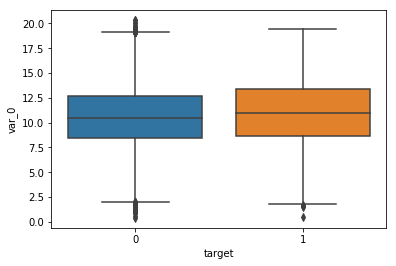

In [7]:
# here is the few examples of outlier visualisation
sns.boxplot(x='target', y= 'var_0', data=train_new)

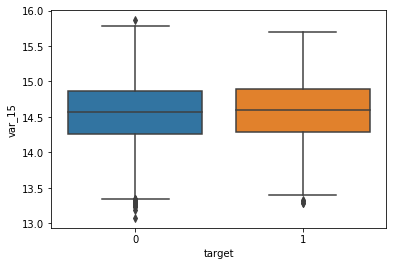

In [8]:
sns.boxplot(x='target', y= 'var_15', data=train_new)

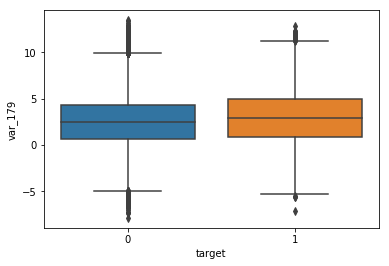

In [9]:
sns.boxplot(x='target', y= 'var_179', data=train_new)

In [ ]:
#By repeating the same process for all variables we can see the boxplot visualisation of data
# Remove outliers and replace it with median vaalues

In [10]:
del train_new['ID_code']

In [11]:
del train_new['target']

In [12]:
cnames= train_new.iloc[:,0:201].columns

In [13]:
cnames

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=200)

In [14]:
df_list= list(train_new)
minPercentile= 0.02
maxPercentile= 0.98

for i in range(len(cnames)):
    train_new[df_list[i]]= train_new[df_list[i]].clip((train_new[df_list[i]].quantile(minPercentile)),(train_new[df_list[i]].quantile(maxPercentile)))

In [15]:
train_new= pd.concat([train.loc[:,'target'], train_new], axis=1)

In [16]:
train_new= pd.concat([train.loc[:,'ID_code'], train_new], axis=1)

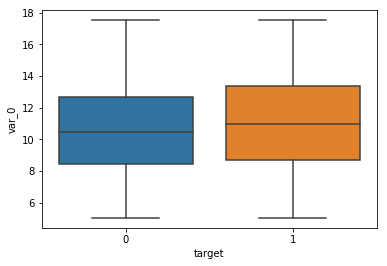

In [17]:
sns.boxplot(x='target', y= 'var_0', data=train_new)

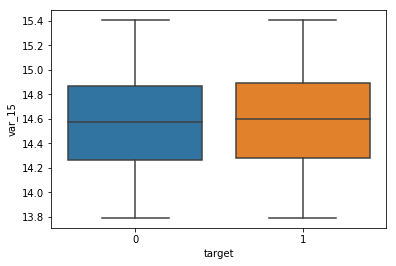

In [18]:
sns.boxplot(x='target', y= 'var_15', data=train_new)

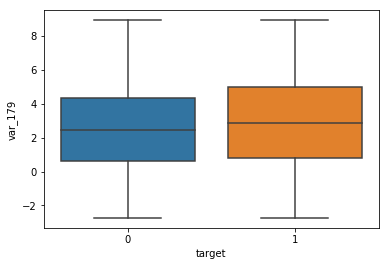

In [20]:
sns.boxplot(x='target', y= 'var_179', data=train_new)

In [ ]:
# ................................feauture selection.........................#

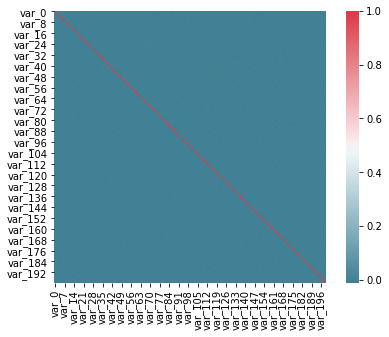

In [33]:
df_corr= train_new.loc[:,cnames]
f,ax= plt.subplots(figsize=(7,5))
corr= df_corr.corr()
sns.heatmap(corr,mask= np.zeros_like(corr,dtype= np.bool),cmap= sns.diverging_palette(220,10,as_cmap= True),square= True,ax=ax)

In [ ]:
# by looking at above graph we can say there is no hihghly positive or negatiue correlation between any two variable

In [ ]:
#sampling data

In [47]:
train_n = train_new.sample(20000)

In [ ]:
#...........................................machine learning....................................#
#...............................over sampling the data using smote...................................#

In [25]:
from sklearn.model_selection import train_test_split

In [48]:
train_dp,validate = train_test_split(train_n,test_size= 0.2)

In [24]:
from imblearn.over_sampling import SMOTE

C:\Users\Kishore\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [35]:
from sklearn.metrics import accuracy_score

In [116]:
from sklearn.metrics import recall_score

In [115]:
from sklearn.metrics import precision_score

In [ ]:
from sklearn.metrics import roc_auc_score

In [49]:
sm = SMOTE(random_state=27, ratio=1.0)
x_train, y_train = sm.fit_sample(train_dp.iloc[:,2:202],train_dp.iloc[:,1])

In [42]:
#...............................logistic regression..............................#
import statsmodels.api as sm

In [51]:
import statsmodels.api as sm
logit= sm.Logit(y_train,x_train).fit()

Optimization terminated successfully.
         Current function value: 0.416353
         Iterations 7


In [55]:
validate['ac_prob']= logit.predict(validate.iloc[:,2:202])

C:\Users\Kishore\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [58]:
validate['actualval']=1
validate.loc[validate.ac_prob <0.5,'actualval']=0

C:\Users\Kishore\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Kishore\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [ ]:
ch= pd.crosstab(validate.iloc[:,1],validate['actualval'])

In [60]:
ch

actualval,0,1
target,,
0,2864,736
1,101,299


In [61]:
tn= ch.iloc[0,0]
fn= ch.iloc[1,0]
fp= ch.iloc[0,1]
tp= ch.iloc[1,1]

In [78]:
#accuracy
(tp+tn)*100/(tp+tn+fp+fn)

79.075

In [79]:
#precision
(tp)*100/(tp+fp)

28.88888888888889

In [77]:
#recall
tp*100/(tp+fn)

74.75

In [80]:
# false negative
 (fn)*100/(fn+tp)

25.25

In [149]:
#Auc
roc_auc_score(validate.iloc[:,1],validate['actualval'])

0.7715277777777778

In [ ]:
# ................................Knearest neighbors ...........................#

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
kn_model= KNeighborsClassifier(n_neighbors=5).fit(x_train,y_train)

In [84]:
kpred=kn_model.predict(validate.iloc[:,2:202])

In [86]:
kch= pd.crosstab(validate.iloc[:,1], kpred)
tn= ch.iloc[0,0]
fn= ch.iloc[1,0]
fp= ch.iloc[0,1]
tp= ch.iloc[1,1]

In [87]:
kch

col_0,0,1
target,,
0,42,3558
1,2,398


In [89]:
#accuracy
accuracy_score(validate.iloc[:,1], kpred)*100

11.0

In [100]:
# precision
precision_score(validate.iloc[:,1], kpred)*100

10.06066734074823

In [103]:
#recall
398*100/(398+2)

99.5

In [119]:
#false negative
2*100/(2+398)

0.5

In [151]:
#Auc
roc_auc_score(validate.iloc[:,1],kpred)

0.5033333333333334

In [ ]:
#..........................................naive bayes..................................#

In [105]:
from sklearn.naive_bayes import GaussianNB

In [107]:
nbmodel= GaussianNB().fit(x_train,y_train)

In [108]:
nbpred= nbmodel.predict(validate.iloc[:,2:202])

In [109]:
nbc= pd.crosstab(validate.iloc[:,1],nbpred)

In [110]:
nbc

col_0,0,1
target,,
0,3484,116
1,375,25


In [113]:
#accuracy
accuracy_score(validate.iloc[:,1],nbpred)*100

87.725

In [114]:
#precision
precision_score(validate.iloc[:,1],nbpred)*100

17.73049645390071

In [117]:
#recall
recall_score(validate.iloc[:,1],nbpred)*100

6.25

In [118]:
#false negative
375/(400)

0.9375

In [152]:
#Auc
roc_auc_score(validate.iloc[:,1],nbpred)

0.5151388888888889

In [ ]:
#..............................predicting target variable for test data.........................#

In [153]:
test= pd.read_csv('test.csv')

In [165]:
test['ac_prob']= logit.predict(test.iloc[:,1:201])

In [166]:
test['target']=1
test.loc[test.ac_prob < 0.5, 'target']= 0

In [170]:
test= test.rename(columns= {'actualval' : 'target'})